## ASTR777 Star and Planet Formation Problem Set 7
### projection of Keplerian disk rotation
### $v_{\rm proj} = v_{\rm Kep} \cos\phi \sin i$
#### where $\phi$ is the polar angle of the disk (in the disk frame) and $i$ is the disk inclination in the sky frame

In [1]:
import os, sys, time           
import numpy as np             
from astropy.io import fits
from astropy import wcs
from astropy.nddata.utils import Cutout2D
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy.visualization import (AsinhStretch, LogStretch, ImageNormalize)
from scipy.interpolate import interp1d, interp2d
from matplotlib.gridspec import GridSpec

%matplotlib inline

In [2]:
# set up plot parameters
import matplotlib as mpl
mpl.rc('xtick.major', size=5, pad=3, width=2)
mpl.rc('ytick.major', size=5, pad=3, width=2)
mpl.rc('xtick.minor', size=2, pad=3, width=2)
mpl.rc('ytick.minor', size=2, pad=3, width=2)
mpl.rc('axes', linewidth=2, labelsize=14, titlesize=18)
mpl.rc('legend', fontsize=14)
mpl.rc('lines', markersize=5)
mpl.rc('font', size=12)
cmap = 'magma'

In [28]:
incl = 30.0
cosi = np.cos(np.radians(incl))
sini = np.sin(np.radians(incl))

rdisk = 1.1    # map size in arcsec
nr = 111
dr = 2*rdisk/nr

# sky frame offset coordinates
x = (np.arange(nr) - nr/2 + 0.5) * dr
y = (np.arange(nr) - nr/2 + 0.5) * dr * cosi

v = np.empty((nr, nr))
v0 = 2.53      # velocity at 1 arcsec = 140 au for a disk at 140 pc and a solar mass star
rout = 1.0     # disk size in arcsec
for i in range(nr):
    for j in range(nr):
        r = np.sqrt(x[i]**2 + (y[j]/cosi)**2)
        if r == 0:
            v[j,i] = np.NaN
        elif r < rout:
            vk = np.sqrt(v0/r)
            phi = np.arctan2(y[j]/cosi, x[i])
            v[j,i] = vk * np.cos(phi) * sini
        else:
            v[j,i] = np.NaN

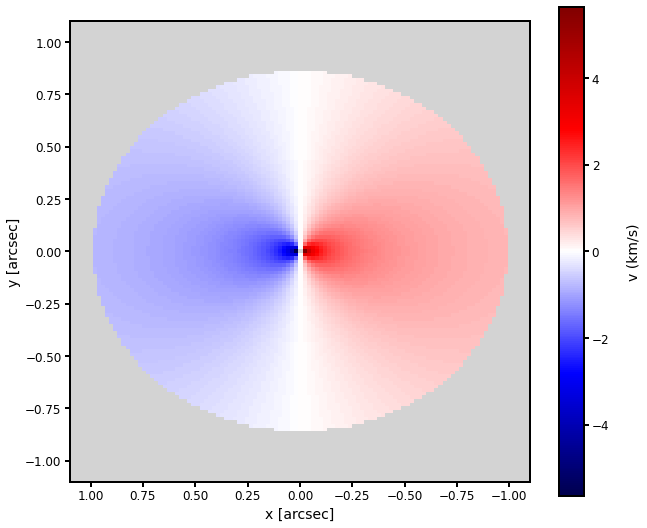

In [27]:
# plot line of sight velocity of an inclined disk
imbounds = (x.max(), x.min(), y.min(), y.max())
xdisk_lims, ydisk_lims = [rdisk, -rdisk], [-rdisk, rdisk]

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(v, origin='lower', cmap='seismic', extent=imbounds, aspect='equal')
ax.set_facecolor('lightgray')

ax.set_xlim(xdisk_lims)
ax.set_ylim(ydisk_lims)
ax.set_xlabel('x [arcsec]')
ax.set_ylabel('y [arcsec]')

# scalebar
cb = plt.colorbar(im, ax=ax, pad=0.05)
cb.set_label('v (km/s)', rotation=90, labelpad=17)

# adjust layout
fig.subplots_adjust(left=0.13, right=0.93, bottom=0.13, top=0.98)

<ipython-input-25-23cfeb0b563a>:14: RuntimeWarning: invalid value encountered in less
  ok = np.where(np.abs(v-v1) < dv/2)


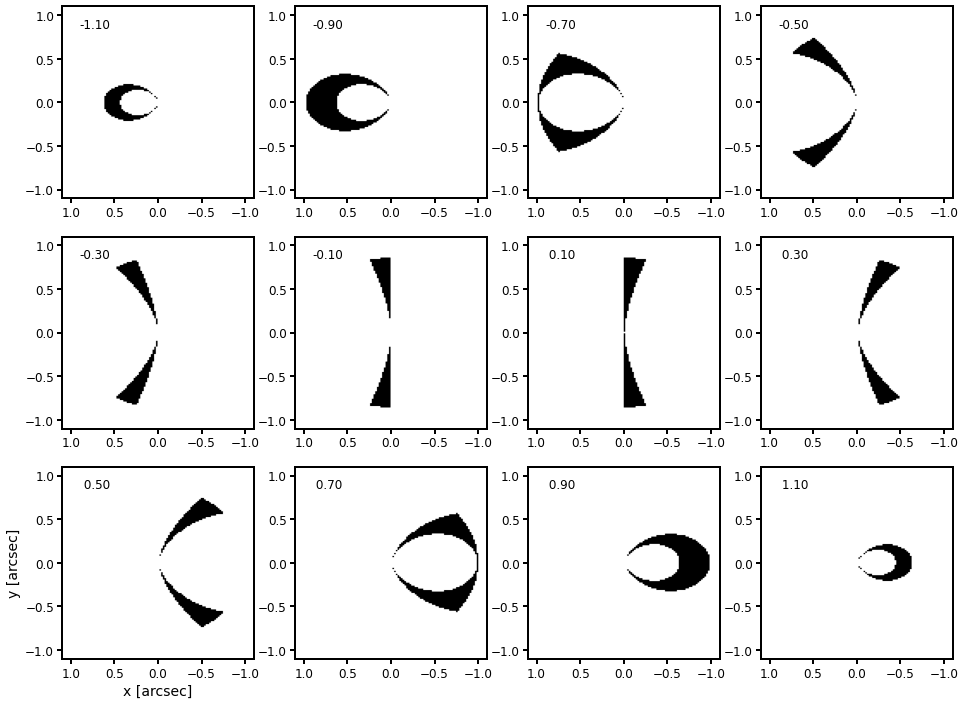

In [25]:
# plot channel maps
fig = plt.figure(figsize=(16,12))

nxplot = 4
nyplot = 3

dv = 0.2
vmin = -(nxplot*nyplot-1) * dv/2
vmax = -vmin + dv/2
vchan = np.arange(vmin, vmax, dv)

for k, v1 in enumerate(vchan):
    ax = plt.subplot(nyplot, nxplot, k+1)
    ok = np.where(np.abs(v-v1) < dv/2)
    vchan = np.zeros((nr,nr))
    vchan[ok] = 1
    im = ax.imshow(vchan, origin='lower', cmap='Greys', extent=imbounds, aspect='equal')
    ax.set_xlim(xdisk_lims)
    ax.set_ylim(ydisk_lims)
    ax.text(0.9, 0.85, f'{v1:5.2f}')
    if k == 8:
        ax.set_xlabel('x [arcsec]')
        ax.set_ylabel('y [arcsec]')
    